In [ ]:
import cv2

def is_blurry(image_path, threshold=100.0):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Compute the Laplacian of the image and then the variance
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()

    # If the variance is below the threshold, the image is blurry
    if laplacian_var < threshold:
        return True, laplacian_var
    else:
        return False, laplacian_var

# Example usage:
image_path = '/content/person.jpeg'  # Replace with your image path
is_blur, variance = is_blurry(image_path)

if is_blur:
    print(f"The image is blurry. Variance: {variance:.2f}")
else:
    print(f"The image is not blurry. Variance: {variance:.2f}")


The image is blurry. Variance: 6.71


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Function to check if an image is blurry
def is_blurry(image, threshold=100.0):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the Laplacian of the image and then the variance
    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()

    return laplacian_var < threshold, laplacian_var

#instead of counting you can also remove them or note the no's

# Initialize counters
blurry_count = 0
not_blurry_count = 0

# Analyze the dataset
for i in range(x_train.shape[0]):
    # Convert the image from RGB to BGR (OpenCV uses BGR format)
    image = cv2.cvtColor(x_train[i], cv2.COLOR_RGB2BGR)

    # Check if the image is blurry
    is_blur, _ = is_blurry(image)

    if is_blur:
        blurry_count += 1
    else:
        not_blurry_count += 1

# Output the results
print(f"Total images: {x_train.shape[0]}")
print(f"Blurry images: {blurry_count}")
print(f"Not blurry images: {not_blurry_count}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Total images: 50000
Blurry images: 13
Not blurry images: 49987


Variance of Laplacian: 6.709452193944883
The image is blurry.


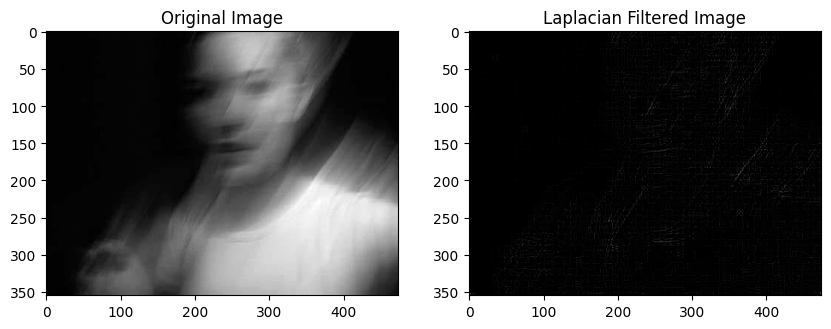

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_laplacian(image):
    # Define the Laplacian kernel (3x3)
    laplacian_kernel = np.array([[0,  1, 0],
                                 [1, -4, 1],
                                 [0,  1, 0]])

    # Get image dimensions
    height, width = image.shape

    # Initialize the output image with zeros
    laplacian_output = np.zeros((height, width), dtype=np.float32)

    # Apply the Laplacian filter to each pixel (excluding borders)
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Extract the region of interest
            region = image[i-1:i+2, j-1:j+2]

            # Apply the Laplacian kernel to the region
            laplacian_value = np.sum(region * laplacian_kernel)

            # Store the result in the output image
            laplacian_output[i, j] = laplacian_value

    # Normalize the result to range [0, 255]
    laplacian_output = np.clip(laplacian_output, 0, 255)

    # Convert the result to uint8
    laplacian_output = laplacian_output.astype(np.uint8)

    return laplacian_output

def calculate_variance_of_laplacian(image):
    # Apply the Laplacian operator using OpenCV's built-in function
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Compute the variance
    variance = laplacian.var()

    return variance

def is_image_blurry(variance, threshold=100):
    # Compare the variance with a threshold to determine if the image is blurry
    if variance < threshold:
        return True
    else:
        return False

# Load a sample image
image = cv2.imread('/content/person.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply custom Laplacian function
laplacian_result = apply_laplacian(image)

# Calculate variance of Laplacian
variance = calculate_variance_of_laplacian(image)

# Determine if the image is blurry
blurry = is_image_blurry(variance)

# Display the result
print(f'Variance of Laplacian: {variance}')
if blurry:
    print("The image is blurry.")
else:
    print("The image is not blurry.")

# Display original and Laplacian filtered image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Laplacian Filtered Image')
plt.imshow(laplacian_result, cmap='gray')
plt.show()
